In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [4]:
filename = "Cat Data/train_catvnoncat.h5"
cat_train_data = h5py.File(filename, 'r')

In [5]:
cat_train_X = np.array(cat_train_data['train_set_x'][:])
cat_train_y = np.array(cat_train_data['train_set_y'][:])

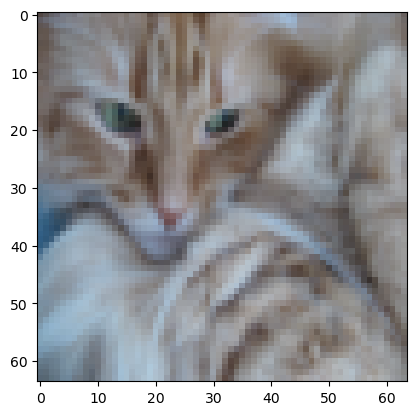

In [6]:
# Demostration of an example
plt.imshow(cat_train_X[2]);

In [7]:
def sigmoid(z):
  s = 1 / (1 + np.exp(-z))
  return s

In [8]:
def initialize_params(dim):
  w = np.zeros(dim, 1)
  b = 0.0
  return w, b

In [9]:
def propagate(w, b, X, Y):
  m = X.shape[0]
  # forward prooagation
  A = sigmoid(np.dot(w.T, X) + b)
  cost = np.sum(-Y*np.log2(A) - (1 - Y)*np.log2(1 - A))

  # Backward propagation
  dL_dw = np.dot(X, (A - Y).T) / m
  dL_db = np.sum(A - Y) / m

  derivatives = {
      "dL_dw" : dL_dw,
      "dL_db" : dL_db
  }

  return derivatives, cost

In [10]:
def optimize(X, Y, alpha=0.01, num_iters=100):
  w, b = initialize_params(X.shape[1])
  costs = []
  for i in range(num_iters):
    grads, cost = propagate(w, b, X, Y)
    dL_dw = grads["dL_dw"]
    dL_db = grads["dL_db"]
    w = w - alpha * dL_dw
    b = b - alpha * dL_db
    costs.append(cost)

  params = {
      "w" : w,
      "b" : b
  }

  derivatives = {
      "dL_dw" : dL_dw,
      "dL_db" : dL_db
  }

  return params, derivatives, costs

In [11]:
def predict(w, b, X):
  A = sigmoid(np.dot(w.T, X) + b)
  y_prediction = (A >= 0.5) * 1
  assert(y_prediction.shape == (1, X.shape[0]))
  return y_prediction